# Requirements

In [4]:
import pandas as pd
import missingno as msno
from sklearn.neighbors import KNeighborsClassifier

In [132]:
# Add as many imports as you need.
from VNP.packages.data_alalysis import *
from VNP.packages.data_preperation import *
from VNP.packages.missing_values import *
from VNP.packages.visualization import *
from VNP.packages.models import *
from VNP.packages.evaluation import *
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


# Laboratory Exercise - Run Mode (8 points)

## Introduction
Mammography is the most effective method for breast cancer screening available today. However, the low positive predictive value of breast biopsy resulting from mammogram interpretation leads to approximately 70% unnecessary biopsies with benign outcomes. To reduce the high number of unnecessary breast biopsies, several computer-aided diagnosis (CAD) systems have been proposed in the last years.These system help physicians in their decision to perform a breast biopsy on a suspicious lesion seen in a mammogram or to perform a short term follow-up examination instead. This data set can be used to predict the severity (benign or malignant) of a mammographic mass lesion from BI-RADS attributes and the patient's age. It contains a BI-RADS assessment, the patient's age and three BI-RADS attributes together with the ground truth (the severity field) for 516 benign and 445 malignant masses that have been identified on full field digital mammograms collected at the Institute of Radiology of the University Erlangen-Nuremberg between 2003 and 2006. Each instance has an associated BI-RADS assessment ranging from 1 (definitely benign) to 5 (highly suggestive of malignancy) assigned in a double-review process by physicians. Assuming that all cases with BI-RADS assessments greater or equal a given value (varying from 1 to 5), are malignant and the other cases benign, sensitivities and associated specificities can be calculated. These can be an indication of how well a CAD system performs compared to the radiologists. For more details visit https://archive.ics.uci.edu/dataset/161/mammographic+mass.

## The Mammographic Mass Dataset

## Downloading the Mammographic Mass Dataset

In [6]:
!gdown 1CyiAL5d2jJHvpzt3XaY3dTto9c2d_h5R # Download the dataset.

'gdown' is not recognized as an internal or external command,
operable program or batch file.


## Exploring the Mammographic Mass Dataset
The Mammographic Mass dataset contains six attributes, among which there is a target attribute and a non-predictive attribute. The target attribute, denoted as 'Severity', is binomial, distinguishing between benign (0) and malignant (1) cases. The non-predictive attribute, 'BI-RADS assessment', is an ordinal scale ranging from 1 to 5. The remaining four attributes are predictive, including 'Age', represented in years as an integer, 'Shape' categorizing mass shape as round (1), oval (2), lobular (3), or irregular (4). 'Margin' classifies mass margins into circumscribed (1), microlobulated (2), obscured (3), ill-defined (4), or spiculated (5). 'Density' indicates mass density as high (1), iso (2), low (3), or fat-containing (4).

Load the dataset into a `pandas` data frame.

In [30]:
# Write your code here. Add as many boxes as you need.
df = pd.read_csv("./data/mammographic-mass.csv")

In [24]:
df.sample(5)

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
672,5.0,64.0,3.0,3.0,3.0,1
693,4.0,79.0,4.0,4.0,3.0,1
730,4.0,45.0,3.0,1.0,3.0,1
80,4.0,67.0,4.0,5.0,3.0,0
428,5.0,58.0,4.0,5.0,3.0,1


In [25]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 6 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   BI-RADS assessment  959 non-null    float64
 1   Age                 956 non-null    float64
 2   Shape               930 non-null    float64
 3   Margin              913 non-null    float64
 4   Density             885 non-null    float64
 5   Severity            961 non-null    int64  
dtypes: float64(5), int64(1)
memory usage: 45.2 KB


In [26]:
df.describe()

,BI-RADS assessment,Age,Shape,Margin,Density,Severity
count,959.000000,956.000000,930.000000,913.000000,885.000000,961.000000
mean,4.348279,55.487448,2.721505,2.796276,2.910734,0.463059
std,1.783031,14.480131,1.242792,1.566546,0.380444,0.498893
min,0.000000,18.000000,1.000000,1.000000,1.000000,0.000000
25%,4.000000,45.000000,2.000000,1.000000,3.000000,0.000000
50%,4.000000,57.000000,3.000000,3.000000,3.000000,0.000000
75%,5.000000,66.000000,4.000000,4.000000,3.000000,1.000000
max,55.000000,96.000000,4.000000,5.000000,4.000000,1.000000


In [27]:
missing_table(df)

,Feature,CountMissing,PercentageMissing,Total
0,BI-RADS assessment,2,0.208117,961
1,Age,5,0.520291,961
2,Shape,31,3.225806,961
3,Margin,48,4.994797,961
4,Density,76,7.908429,961
5,Severity,0,0.000000,961


Drop the column `BI-RADS assessment` as it shouldn't be used for prediction.

In [31]:
# Write your code here. Add as many boxes as you need.
# Drop the non-predictive feature BI-RADS
df = df.drop(columns="BI-RADS assessment")
df

,Age,Shape,Margin,Density,Severity
0,67.0,3.0,5.0,3.0,1
1,43.0,1.0,1.0,NaN,1
2,58.0,4.0,5.0,3.0,1
3,28.0,1.0,1.0,3.0,0
4,74.0,1.0,5.0,NaN,1
...,...,...,...,...,...
956,47.0,2.0,1.0,3.0,0
957,56.0,4.0,5.0,3.0,1
958,64.0,4.0,5.0,3.0,0
959,66.0,4.0,5.0,3.0,1


Explore the dataset using visualizations of your choice.

In [32]:
# Write your code here. Add as many boxes as you need.

missing_features_name = get_missing_features_name(df)
missing_features_name

['Age', 'Shape', 'Margin', 'Density']

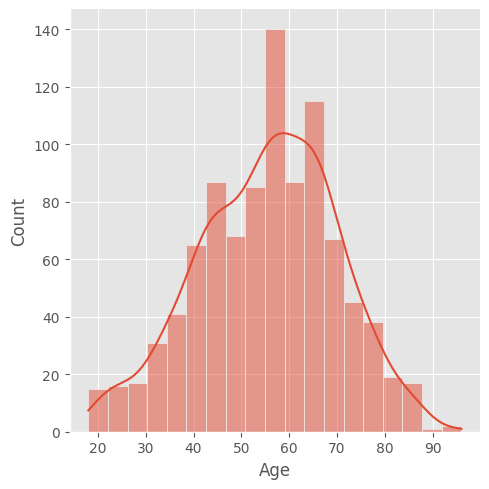

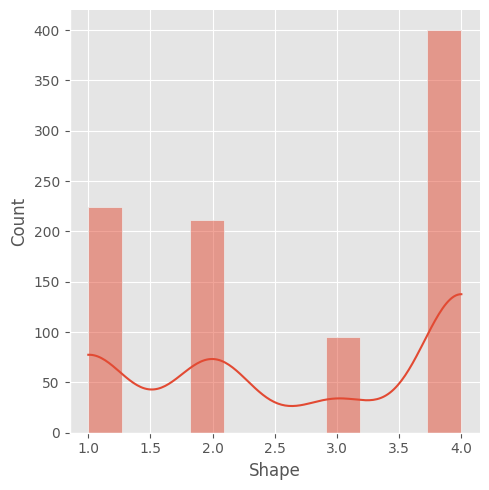

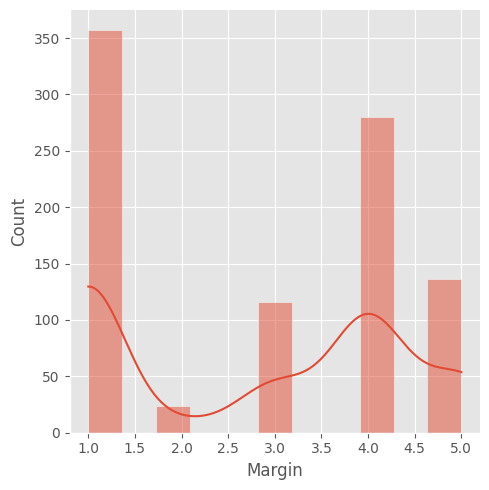

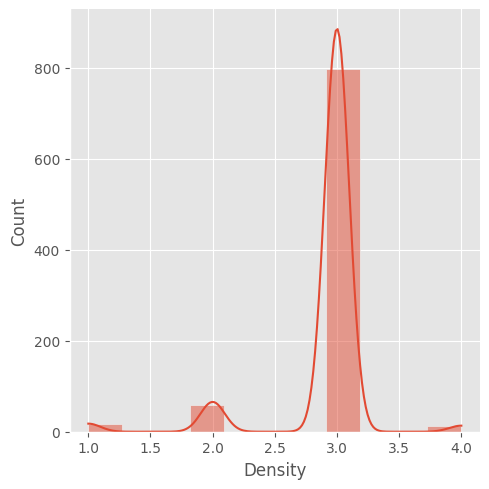

In [33]:
show_displots(df, missing_features_name)

Check if the dataset is balanced.

In [35]:
# Write your code here. Add as many boxes as you need.
balance_table(df, "Severity")

,Class,Count,Percentage,Total
0,0,516,0.536941,961
1,1,445,0.463059,961


## Detecting Missing Values
Calculate the percentage of missing values present in each column of the dataset.

In [36]:
# Write your code here. Add as many boxes as you need.
missing_table(df)

,Feature,CountMissing,PercentageMissing,Total
0,Age,5,0.520291,961
1,Shape,31,3.225806,961
2,Margin,48,4.994797,961
3,Density,76,7.908429,961
4,Severity,0,0.000000,961


## Understanding the Causes Behind Missing Values
Using visualization tools such as heatmaps, and dendrograms, illustrate the interdependence between attributes with missing values. Also, visualize the distribution of the missing values within the dataset using matrices and bar charts. To achieve this use the `missingno` library.

<Axes: >

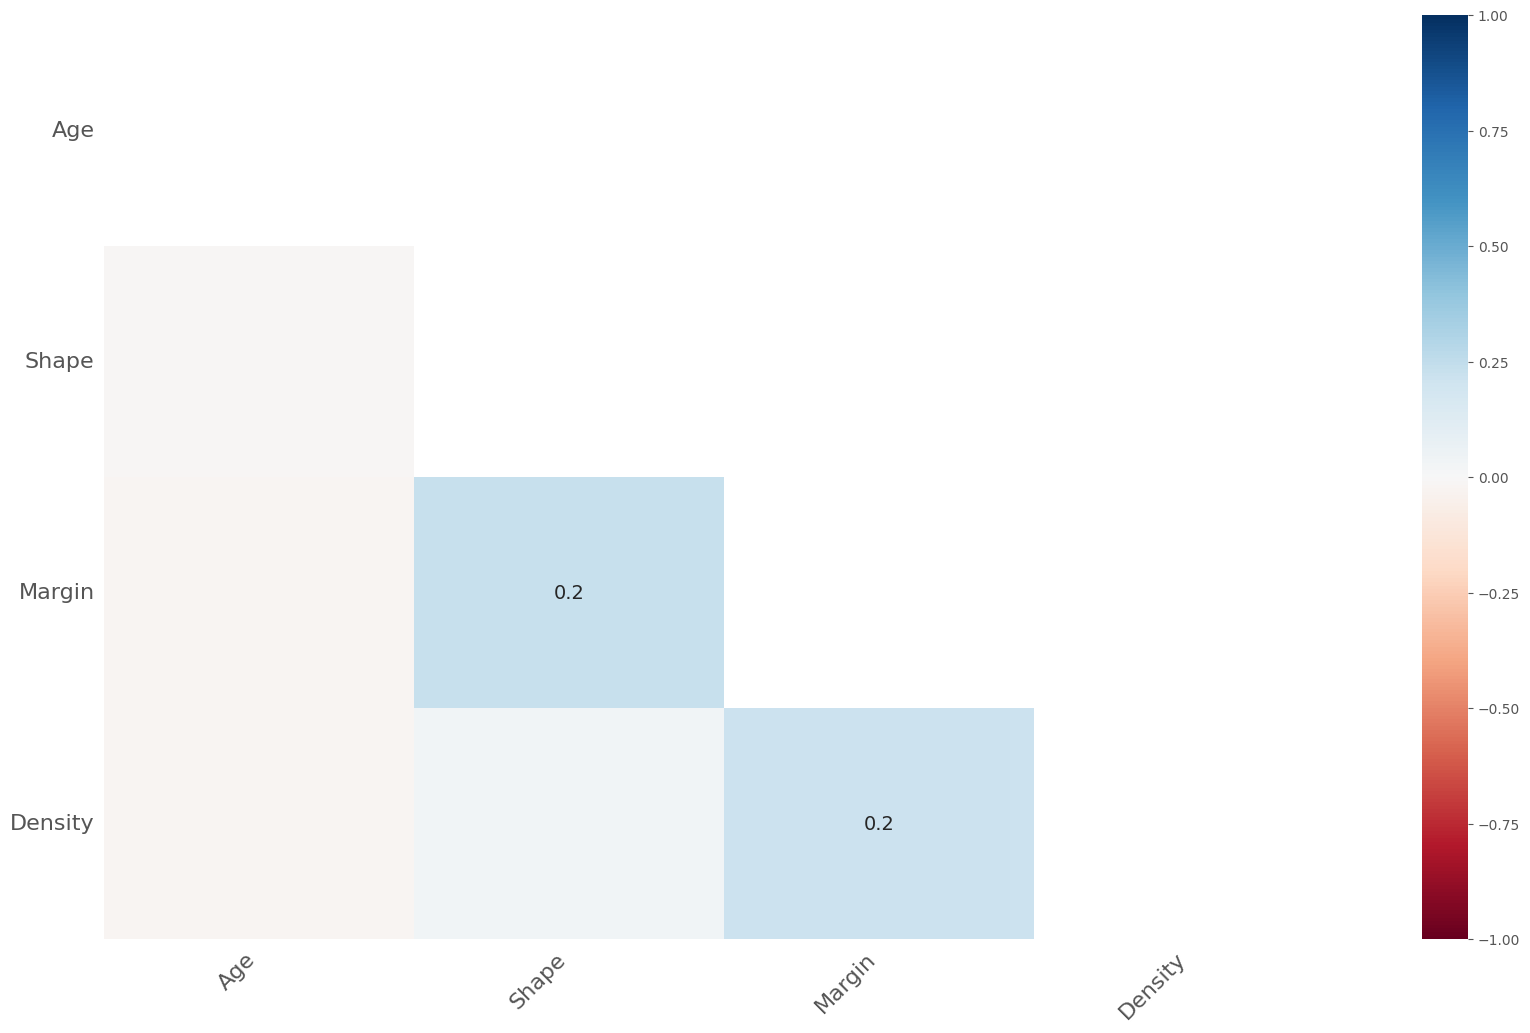

In [37]:
# Write your code here. Add as many boxes as you need.
msno.heatmap(df)

<Axes: >

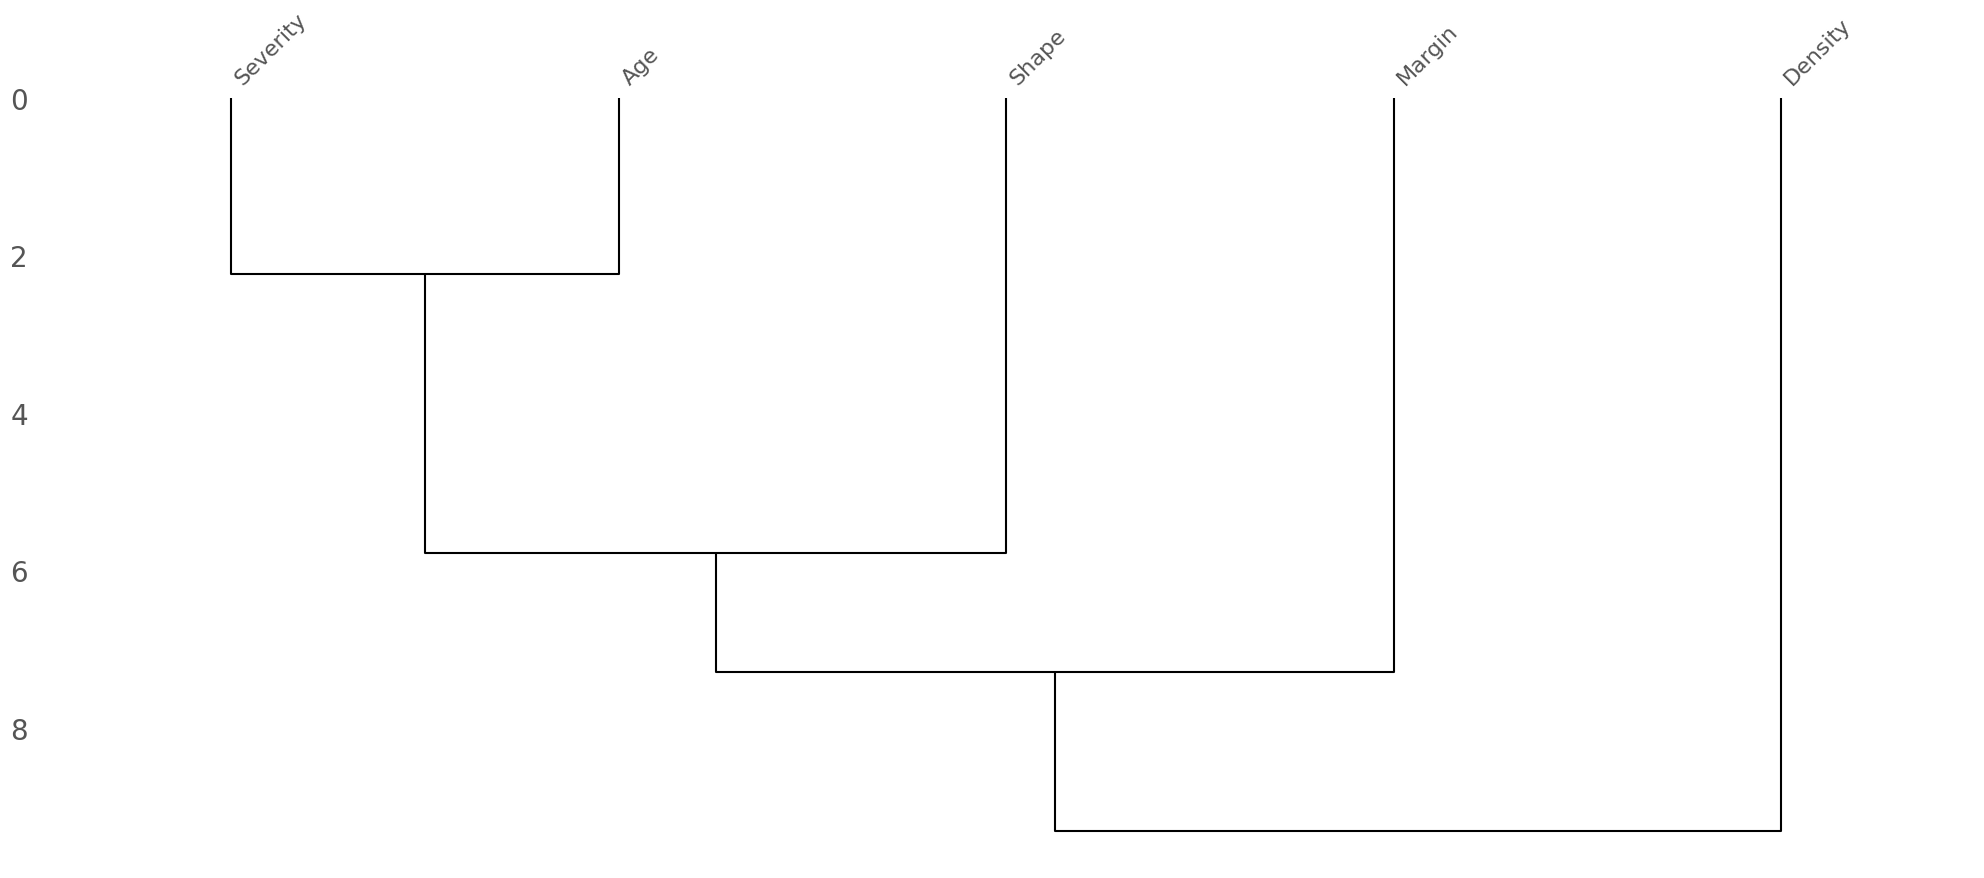

In [44]:
msno.dendrogram(df)

<Axes: >

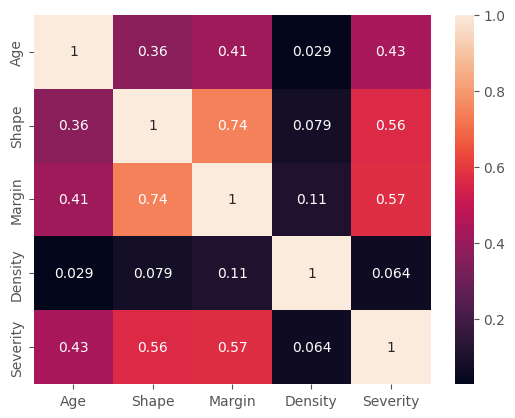

In [46]:
sns.heatmap(df.corr(), annot=True)

## Handling the Missing Values
Handle the missing values using suitable method based on the insights obtained from the various visualizations.

In [40]:
# Write your code here. Add as many boxes as you need.
df_copy = uncorrelated_imputer(df, missing_feature="Age", strategy="mean")

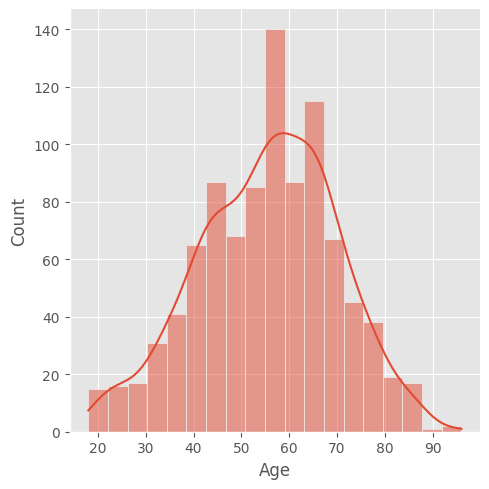

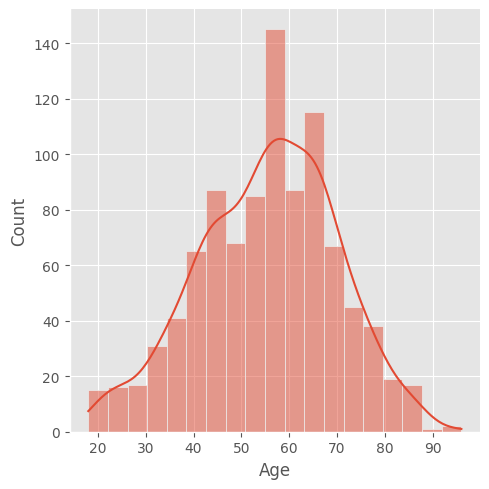

In [43]:
show_displot_before_and_after_inputation(df, df_copy, "Age")

In [102]:
df_copy_1 = correlated_imputer(df_copy,correlated_columns=["Margin", "Shape"], strategy="mice")

In [103]:
df_copy_1["Margin"] = df_copy_1["Margin"].round()
df_copy_1["Shape"] = df_copy_1["Shape"].round()


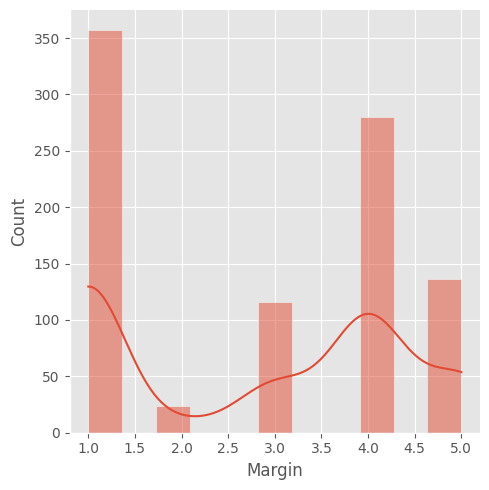

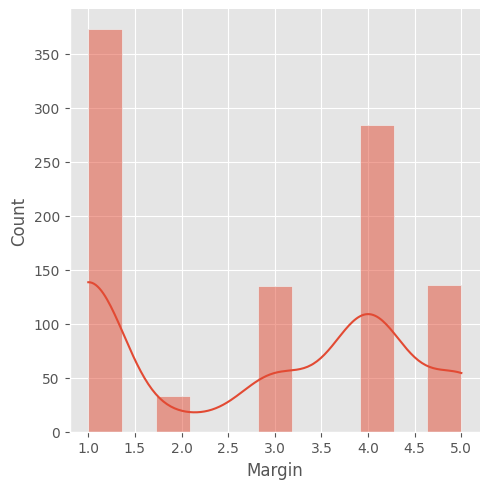

In [104]:
show_displot_before_and_after_inputation(df_copy,df_copy_1, "Margin")

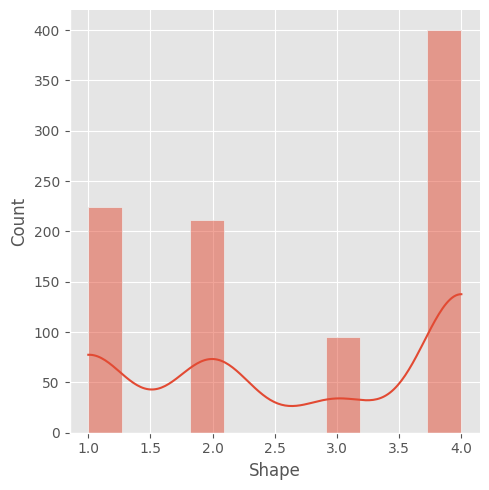

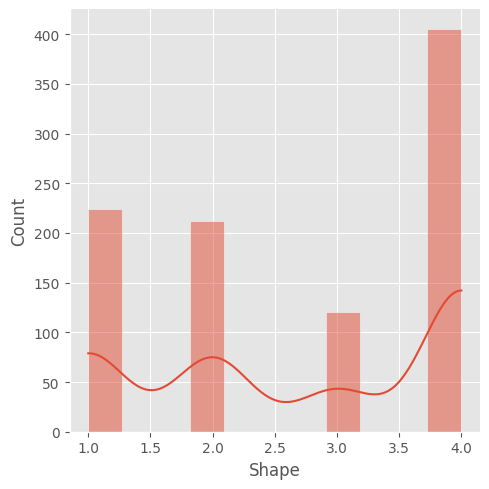

In [105]:
show_displot_before_and_after_inputation(df_copy,df_copy_1, "Shape")


In [106]:
missing_table(df_copy_1)

,Feature,CountMissing,PercentageMissing,Total
0,Age,0,0.000000,961
1,Shape,0,0.000000,961
2,Margin,0,0.000000,961
3,Density,76,7.908429,961
4,Severity,0,0.000000,961


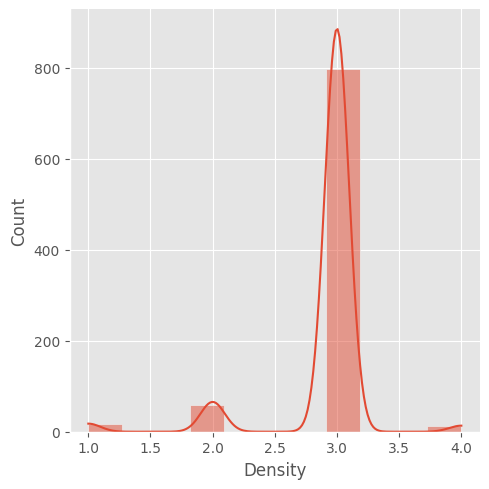

In [107]:
sns.displot(df_copy_1["Density"], kde=True)

In [108]:
df_copy_2 = correlated_imputer(df_copy_1, correlated_columns=["Density", "Margin"], strategy="mice", n_neighbours=5)

In [109]:
df_copy_2["Density"] = df_copy_2["Density"].round()

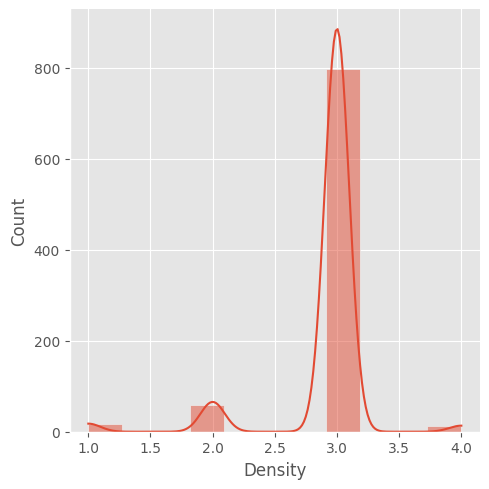

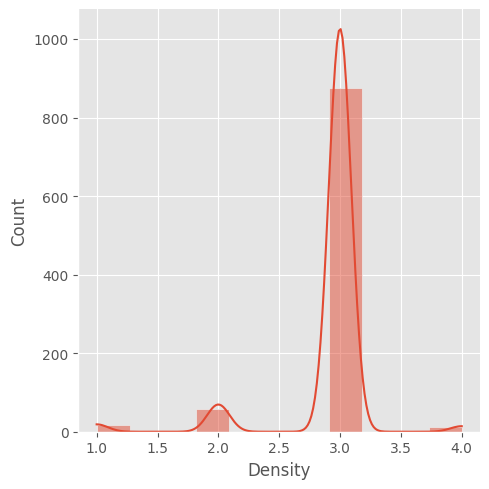

In [110]:
show_displot_before_and_after_inputation(df_copy_1, df_copy_2, "Density")

In [111]:
missing_table(df_copy_2)

,Feature,CountMissing,PercentageMissing,Total
0,Age,0,0.0,961
1,Shape,0,0.0,961
2,Margin,0,0.0,961
3,Density,0,0.0,961
4,Severity,0,0.0,961


In [121]:
df_copy_2.sample(5)

,Age,Shape,Margin,Density,Severity
44,62.0,3.0,5.0,2.0,1
566,61.0,3.0,4.0,3.0,0
147,63.0,4.0,4.0,3.0,1
540,21.0,3.0,1.0,3.0,0
773,68.0,4.0,4.0,3.0,0


## Dataset Splitting
Partition the dataset into training and testing sets with an 80:20 ratio.

In [122]:
# Write your code here. Add as many boxes as you need.
X = df_copy_2.drop(columns="Severity")
Y = df_copy_2["Severity"]

In [123]:
x_train,x_test,y_train,y_test = train_test_split(X,Y,shuffle=True,random_state=0, test_size=0.2)

## Feature Scaling
Standardize the features using `StandardScaler`.

In [124]:
# Write your code here. Add as many boxes as you need.
standard_scaler = StandardScaler()
standard_scaler.fit(x_train)

StandardScaler()

In [127]:
x_train_scaled = pd.DataFrame(standard_scaler.transform(x_train), columns=x_train.columns)
x_test_scaled = pd.DataFrame(standard_scaler.transform(x_test), columns=x_train.columns)

In [128]:
x_train_scaled

,Age,Shape,Margin,Density
0,-1.591613,-0.602843,-1.151889,0.228819
1,-0.429478,1.027381,0.789554,0.228819
2,0.117408,-0.602843,1.436701,0.228819
3,0.801017,-0.602843,0.789554,-5.096431
4,-1.386530,-0.602843,-1.151889,0.228819
...,...,...,...,...
763,1.074460,1.027381,1.436701,0.228819
764,0.322491,0.212269,-1.151889,0.228819
765,-1.659974,-0.602843,-1.151889,0.228819
766,1.894790,1.027381,1.436701,0.228819


In [129]:
x_test_scaled

,Age,Shape,Margin,Density
0,-0.839643,0.212269,0.789554,0.228819
1,-0.702922,-1.417955,-1.151889,0.228819
2,0.322491,-0.602843,-1.151889,-2.433806
3,-2.206860,-0.602843,-1.151889,0.228819
4,-0.019313,-0.602843,-1.151889,0.228819
...,...,...,...,...
188,-0.497839,1.027381,0.789554,0.228819
189,-0.087674,-1.417955,-1.151889,0.228819
190,-0.976365,0.212269,0.142406,-2.433806
191,1.826430,1.027381,1.436701,0.228819


## Decision Tree

In [141]:
df_copy_2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 961 entries, 0 to 960
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Age       961 non-null    float64
 1   Shape     961 non-null    float64
 2   Margin    961 non-null    float64
 3   Density   961 non-null    float64
 4   Severity  961 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 37.7 KB


Create an instance of the Decision tree
 model and train it using the `fit` function.

In [175]:
# Write your code here. Add as many boxes as you need.
tree_classifier = DecisionTreeClassifier(max_depth=2, max_leaf_nodes=5, criterion="entropy", )
tree_classifier.fit(x_train_scaled, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=2, max_leaf_nodes=5)

Use the trained model to make predictions for the test set.

In [176]:
# Write your code here. Add as many boxes as you need.
predict = tree_classifier.predict(x_test_scaled)

Assess the performance of the model by using different classification metrics provided by the `scikit-learn` library.

In [177]:
# Write your code here. Add as many boxes as you need.
print(classification_report(y_test,predict))

              precision    recall  f1-score   support

           0       0.73      0.85      0.79       100
           1       0.81      0.67      0.73        93

    accuracy                           0.76       193
   macro avg       0.77      0.76      0.76       193
weighted avg       0.77      0.76      0.76       193



In [178]:
balance_table(df_copy_2, "Severity")

,Class,Count,Percentage,Total
0,0,516,0.536941,961
1,1,445,0.463059,961


# Laboratory Exercise - Bonus Task (+ 2 points)

As part of the bonus task in this laboratory assignment, your objective is to fine-tune three hyperparametars
using a validation set. This involves experimenting with various values for the hyperparametars and evaluating the model's performance on a validation set. Upon determining the most suitable value, evaluate the model's performance on a test set for final assessment.

## Dataset Splitting
To achieve the required split of the dataset into three sets (train set, validation set, and test set) in a ratio of 70:10:20, you can follow these steps:

- Start by splitting the dataset into a ratio of 80:20 to create the initial train and test sets.
- Subsequently, divide the initial train set further into a ratio of 87.5:12.5 to generate the final train and validation sets.

This process can be accomplished using appropriate functions from libraries such as `scikit-learn` or manually.

In [179]:
# Write your code here. Add as many boxes as you need.

## Fine-tuning the Hyperparameters



In [180]:
# Write your code here. Add as many boxes as you need.

In [181]:
# Write your code here. Add as many boxes as you need.

## Final Assessment of the Model Performance

evaluate the model's performance on a test set for final assessment.

In [182]:
# Write your code here. Add as many boxes as you need.